In [1]:
!pip install dtaidistance

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 25.5 MB/s eta 0:00:00


In [2]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from dtaidistance import dtw
from scipy.stats import pearsonr
from scipy.spatial import procrustes

# Example
series1 = [0.3, 0.5, 0.1, 0.7, 0.9]
series2 = [0.5, 0.7, 0.2, 0.9, 0.5]


def percentage_similarity(series1, series2):
    # Ensure equal length
    if len(series1) != len(series2):
        raise ValueError("Series must be of equal length")
    # Compute absolute differences
    abs_diff = np.abs(np.array(series1) - np.array(series2))
    # Normalize by the range of the data (max - min of combined series)
    data_range = np.max([series1, series2]) - np.min([series1, series2])
    if data_range == 0:
        return 100.0  # Avoid division by zero (identical series)
    similarity = (1 - np.mean(abs_diff) / data_range) * 100
    return similarity


def cosine_percentage(series1, series2):
    # Reshape to 2D arrays (required by sklearn)
    a = np.array(series1).reshape(1, -1)
    b = np.array(series2).reshape(1, -1)
    # Compute cosine similarity and convert to percentage
    cos_sim = cosine_similarity(a, b)[0][0]
    return (cos_sim + 1) / 2 * 100


def euclidean_percentage(series1, series2):
    # Compute Euclidean distance
    euclidean_dist = np.linalg.norm(np.array(series1) - np.array(series2))
    # Max possible distance (e.g., if data is normalized between 0 and 1)
    max_dist = np.sqrt(len(series1))  # For normalized [0,1] data
    return (1 - euclidean_dist / max_dist) * 100


def dtw_percentage(series1, series2):
    # Compute DTW distance
    dtw_distance = dtw.distance(series1, series2)
    # Normalize by the maximum possible distance (approximate)
    max_length = max(len(series1), len(series2))
    normalized_dist = dtw_distance / (max_length * (np.max(series1) - np.min(series1)))
    return (1 - normalized_dist) * 100


def pearson_percentage(series1, series2):
    r, _ = pearsonr(series1, series2)
    return (r + 1) / 2 * 100
    # return r * 100


def procrustes_percentage(series1, series2):
    a = np.array(series1).reshape(1, -1)
    b = np.array(series2).reshape(1, -1)
    mtx1, mtx2, disparity = procrustes(a, b)
    return (1 - disparity) * 100


print(f"Percentage similarity: {percentage_similarity(series1, series2):.2f}%")
print(f"Cosine similarity: {cosine_percentage(series1, series2):.2f}%")
print(f"Euclidean similarity: {euclidean_percentage(series1, series2):.2f}%")
print(f"DTW similarity: {dtw_percentage(series1, series2):.2f}%")
print(f"Pearson similarity: {pearson_percentage(series1, series2):.2f}%")
# print(f"Procrustes similarity: {procrustes_percentage(series1, series2):.2f}%")

Percentage similarity: 72.50%
Cosine similarity: 95.91%
Euclidean similarity: 75.92%
DTW similarity: 86.54%
Pearson similarity: 80.32%


In [3]:
!pip install yfinance

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import requests
import yfinance as yf
import plotly.graph_objects as go

In [5]:
# valid_range =     "1d","5d","1mo","3mo","6mo","1y","2y","5y","10y","ytd","max"
# interval = "1d"

# symbol = "TITAGARH.NS"
symbol = "^NSEI"
rng = "10y"
interval = "1d"

url = 'https://query1.finance.yahoo.com/v8/finance/chart/' + symbol + '?interval=' + interval + '&range=' + rng
url

'https://query1.finance.yahoo.com/v8/finance/chart/^NSEI?interval=1d&range=10y'

In [6]:
# yresp = requests.get(url)
# yresp.text

In [7]:
yresp2 = yf.Ticker(symbol)
hist = yresp2.history(period=rng, interval=interval)

yresp2

yfinance.Ticker object <^NSEI>

In [8]:
# dir(yresp2)

In [9]:
# print('Sector', '-' , yresp2.info['sector'])
# print('Name', '-' , yresp2.info['shortName'])
# print('Price', '-' , yresp2.info['currentPrice'])
# print('DayLow', '-' , yresp2.info['dayLow'])
# print('DayHigh', '-' , yresp2.info['dayHigh'])
# print('Target HighPrice', '-' , yresp2.info['targetHighPrice'])
# print('Target LowPrice', '-' , yresp2.info['targetLowPrice'])
# print('Target MeanPrice', '-' , yresp2.info['targetMeanPrice'])
# print('Target Median Price', '-' , yresp2.info['targetMedianPrice'])

In [10]:
# hist['Profit Percentage'] = (hist['Open'].shift(-1) - hist['Close']) / hist['Close'] * 100
# hist['Profit Percentage'] = hist['Profit Percentage'].round(2)
# hist

In [11]:
# best_perfom = hist.sort_values(by='Profit Percentage', ascending=False)

In [12]:
hist2 = hist.reset_index()
hist2 = hist2.fillna(0)
hist2

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2015-03-20 00:00:00+05:30,8627.900391,8627.900391,8553.000000,8570.900391,174600,0.0,0.0
1,2015-03-23 00:00:00+05:30,8591.549805,8608.349609,8540.549805,8550.900391,150700,0.0,0.0
2,2015-03-24 00:00:00+05:30,8537.049805,8627.750000,8535.849609,8542.950195,156700,0.0,0.0
3,2015-03-25 00:00:00+05:30,8568.900391,8573.750000,8516.549805,8530.799805,161000,0.0,0.0
4,2015-03-26 00:00:00+05:30,8474.950195,8499.450195,8325.349609,8342.150391,280100,0.0,0.0
...,...,...,...,...,...,...,...,...
2457,2025-03-13 00:00:00+05:30,22541.500000,22558.050781,22377.349609,22397.199219,287500,0.0,0.0
2458,2025-03-17 00:00:00+05:30,22353.150391,22577.000000,22353.150391,22508.750000,251100,0.0,0.0
2459,2025-03-18 00:00:00+05:30,22662.250000,22857.800781,22599.199219,22834.300781,272600,0.0,0.0
2460,2025-03-19 00:00:00+05:30,22874.949219,22940.699219,22807.949219,22907.599609,324000,0.0,0.0


In [13]:
hist2['AVGOHLC'] = (hist2.Open+hist2.Close+hist2.High+hist2.Low)/4
hist2['EMA9'] = hist2['AVGOHLC'].ewm(span=9, adjust=False).mean()
hist2['EMA50'] = hist2['AVGOHLC'].ewm(span=50, adjust=False).mean()
hist2['HIGH_MARKER'] = abs(round((hist2.EMA9-hist2.High)/hist2.EMA9*1000,0))
hist2['LOW_MARKER'] = abs(round((hist2.Low-hist2.EMA9)/hist2.EMA9*1000,0))
hist2['CANDLE_MARKER'] = hist2.apply(lambda x: int(x.HIGH_MARKER) if (x.HIGH_MARKER >=0 and x.HIGH_MARKER <5) else (int(x.LOW_MARKER) if (x.LOW_MARKER >=0 and x.LOW_MARKER <5) else ""), axis=1)
hist2

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,AVGOHLC,EMA9,EMA50,HIGH_MARKER,LOW_MARKER,CANDLE_MARKER
0,2015-03-20 00:00:00+05:30,8627.900391,8627.900391,8553.000000,8570.900391,174600,0.0,0.0,8594.925293,8594.925293,8594.925293,4.0,5.0,4
1,2015-03-23 00:00:00+05:30,8591.549805,8608.349609,8540.549805,8550.900391,150700,0.0,0.0,8572.837402,8590.507715,8594.059101,2.0,6.0,2
2,2015-03-24 00:00:00+05:30,8537.049805,8627.750000,8535.849609,8542.950195,156700,0.0,0.0,8560.899902,8584.586152,8592.758740,5.0,6.0,
3,2015-03-25 00:00:00+05:30,8568.900391,8573.750000,8516.549805,8530.799805,161000,0.0,0.0,8547.500000,8577.168922,8590.983888,0.0,7.0,0
4,2015-03-26 00:00:00+05:30,8474.950195,8499.450195,8325.349609,8342.150391,280100,0.0,0.0,8410.475098,8543.830157,8583.905112,5.0,26.0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2457,2025-03-13 00:00:00+05:30,22541.500000,22558.050781,22377.349609,22397.199219,287500,0.0,0.0,22468.524902,22460.516098,23026.639364,4.0,4.0,4
2458,2025-03-17 00:00:00+05:30,22353.150391,22577.000000,22353.150391,22508.750000,251100,0.0,0.0,22448.012695,22458.015417,23003.948122,5.0,5.0,
2459,2025-03-18 00:00:00+05:30,22662.250000,22857.800781,22599.199219,22834.300781,272600,0.0,0.0,22738.387695,22514.089873,22993.533988,15.0,4.0,4
2460,2025-03-19 00:00:00+05:30,22874.949219,22940.699219,22807.949219,22907.599609,324000,0.0,0.0,22882.799316,22587.831762,22989.191452,16.0,10.0,


In [14]:
col_name = 'AVGOHLC'
ln = hist2[col_name].count()
s1 =  hist2.loc[ln-30:, [col_name]]
# s1 =  hist2.loc[ln-35:ln-35+29, [col_name]]
s2 =  hist2.loc[10:39, [col_name]]
s1 = (s1 / s1.max()).round(3)
s2 = (s2 / s2.max()).round(3)
print(s1.count())
print(s2.count())
print(f"Percentage similarity: {percentage_similarity(s1, s2):.2f}%")
print(f"Cosine similarity: {cosine_percentage(s1, s2):.2f}%")
print(f"Euclidean similarity: {euclidean_percentage(s1, s2):.2f}%")
print(f"DTW similarity: {dtw_percentage(s1.reset_index(drop=True)[col_name], s2.reset_index(drop=True)[col_name]):.2f}%")
print(f"Pearson similarity: {pearson_percentage(s1[col_name], s2[col_name]):.2f}%")

hist2['C2'] = 0
hist2['Pearson'] = 0
hist2['Per%Simi'] = 0
hist2['Cosine'] = 0
hist2['Euclidean'] = 0
for i in range(ln-30):
  s2 =  hist2.loc[i:i+29, [col_name]]
  s2 = (s2 / s2.max()).round(3)
  hist2.loc[i, ["Pearson"]] = f"{pearson_percentage(s1[col_name], s2[col_name]):.2f}%"
  hist2.loc[i, ["Per%Simi"]] = f"{percentage_similarity(s1[col_name], s2[col_name]):.2f}%"
  hist2.loc[i, ["Cosine"]] = f"{cosine_percentage(s1[col_name], s2[col_name]):.2f}%"
  hist2.loc[i, ["Euclidean"]] = f"{euclidean_percentage(s1[col_name], s2[col_name]):.2f}%"
  hist2.loc[i, ["DTW"]] = f"{dtw_percentage(s1.reset_index(drop=True)[col_name], s2.reset_index(drop=True)[col_name]):.2f}%"
  hist2.loc[i, ["Pearson2"]] = int(pearson_percentage(s1[col_name], s2[col_name])*1000)
hist2

AVGOHLC    30
dtype: int64
AVGOHLC    30
dtype: int64
Percentage similarity: 86.24%
Cosine similarity: 100.00%
Euclidean similarity: 98.66%
DTW similarity: 98.31%
Pearson similarity: 93.34%


<ipython-input-14-b17efee01f2d>:24: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '58.26%' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  hist2.loc[i, ["Pearson"]] = f"{pearson_percentage(s1[col_name], s2[col_name]):.2f}%"
<ipython-input-14-b17efee01f2d>:25: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '74.27%' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  hist2.loc[i, ["Per%Simi"]] = f"{percentage_similarity(s1[col_name], s2[col_name]):.2f}%"
<ipython-input-14-b17efee01f2d>:26: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '99.98%' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  hist2.loc[i, ["Cosine"]] = f"{cosine_per

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,AVGOHLC,EMA9,...,HIGH_MARKER,LOW_MARKER,CANDLE_MARKER,C2,Pearson,Per%Simi,Cosine,Euclidean,DTW,Pearson2
0,2015-03-20 00:00:00+05:30,8627.900391,8627.900391,8553.000000,8570.900391,174600,0.0,0.0,8594.925293,8594.925293,...,4.0,5.0,4,0,58.26%,74.27%,99.98%,97.41%,95.54%,58260.0
1,2015-03-23 00:00:00+05:30,8591.549805,8608.349609,8540.549805,8550.900391,150700,0.0,0.0,8572.837402,8590.507715,...,2.0,6.0,2,0,59.89%,73.92%,99.98%,97.42%,95.26%,59892.0
2,2015-03-24 00:00:00+05:30,8537.049805,8627.750000,8535.849609,8542.950195,156700,0.0,0.0,8560.899902,8584.586152,...,5.0,6.0,,0,63.09%,74.43%,99.98%,97.51%,95.84%,63091.0
3,2015-03-25 00:00:00+05:30,8568.900391,8573.750000,8516.549805,8530.799805,161000,0.0,0.0,8547.500000,8577.168922,...,0.0,7.0,0,0,66.12%,75.49%,99.98%,97.58%,95.63%,66117.0
4,2015-03-26 00:00:00+05:30,8474.950195,8499.450195,8325.349609,8342.150391,280100,0.0,0.0,8410.475098,8543.830157,...,5.0,26.0,,0,68.55%,76.43%,99.98%,97.62%,95.24%,68553.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2457,2025-03-13 00:00:00+05:30,22541.500000,22558.050781,22377.349609,22397.199219,287500,0.0,0.0,22468.524902,22460.516098,...,4.0,4.0,4,0,0,0,0,0,NaN,NaN
2458,2025-03-17 00:00:00+05:30,22353.150391,22577.000000,22353.150391,22508.750000,251100,0.0,0.0,22448.012695,22458.015417,...,5.0,5.0,,0,0,0,0,0,NaN,NaN
2459,2025-03-18 00:00:00+05:30,22662.250000,22857.800781,22599.199219,22834.300781,272600,0.0,0.0,22738.387695,22514.089873,...,15.0,4.0,4,0,0,0,0,0,NaN,NaN
2460,2025-03-19 00:00:00+05:30,22874.949219,22940.699219,22807.949219,22907.599609,324000,0.0,0.0,22882.799316,22587.831762,...,16.0,10.0,,0,0,0,0,0,NaN,NaN


In [15]:
hist2.fillna(0, inplace=True)
hist2_t10 = hist2.sort_values(by='Pearson2', ascending=False).head(10)
hist2_t10

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,AVGOHLC,EMA9,...,HIGH_MARKER,LOW_MARKER,CANDLE_MARKER,C2,Pearson,Per%Simi,Cosine,Euclidean,DTW,Pearson2
2431,2025-02-04 00:00:00+05:30,23509.900391,23762.750000,23423.150391,23739.250000,376700,0.0,0.0,23608.762695,23300.165316,...,20.0,5.0,,0,97.57%,93.33%,100.00%,99.40%,99.61%,97566.0
1209,2020-02-26 00:00:00+05:30,11738.549805,11783.250000,11639.599609,11678.500000,567600,0.0,0.0,11709.974854,11953.308548,...,14.0,26.0,,0,95.40%,55.51%,99.66%,82.50%,57.33%,95398.0
1210,2020-02-27 00:00:00+05:30,11661.250000,11663.849609,11536.700195,11633.299805,608600,0.0,0.0,11623.774902,11887.401819,...,19.0,30.0,,0,95.39%,54.30%,99.69%,82.62%,57.96%,95391.0
11,2015-04-08 00:00:00+05:30,8698.950195,8730.500000,8679.799805,8714.400391,148200,0.0,0.0,8705.912598,8584.338629,...,17.0,11.0,,0,95.07%,87.41%,100.00%,98.77%,98.54%,95074.0
143,2015-10-19 00:00:00+05:30,8262.549805,8283.049805,8239.200195,8275.049805,124500,0.0,0.0,8264.962402,8157.419430,...,15.0,10.0,,0,94.92%,89.81%,100.00%,99.02%,98.65%,94922.0
391,2016-10-27 00:00:00+05:30,8607.099609,8624.849609,8550.250000,8615.250000,242800,0.0,0.0,8599.362305,8657.291887,...,4.0,12.0,4,0,94.86%,87.15%,100.00%,98.83%,98.25%,94863.0
1208,2020-02-25 00:00:00+05:30,11877.500000,11883.049805,11779.900391,11797.900391,461000,0.0,0.0,11834.587646,12014.141972,...,11.0,19.0,,0,94.62%,56.21%,99.63%,82.19%,56.29%,94621.0
390,2016-10-26 00:00:00+05:30,8657.299805,8657.299805,8596.599609,8615.250000,219300,0.0,0.0,8631.612305,8671.774282,...,2.0,9.0,2,0,94.36%,85.79%,100.00%,98.75%,97.99%,94362.0
12,2015-04-09 00:00:00+05:30,8756.200195,8785.500000,8682.450195,8778.299805,152700,0.0,0.0,8750.612549,8617.593413,...,19.0,8.0,,0,94.25%,87.65%,100.00%,98.69%,98.52%,94248.0
142,2015-10-16 00:00:00+05:30,8193.650391,8246.400391,8147.649902,8238.150391,156400,0.0,0.0,8206.462769,8130.533686,...,14.0,2.0,2,0,93.98%,87.82%,100.00%,98.89%,98.78%,93980.0


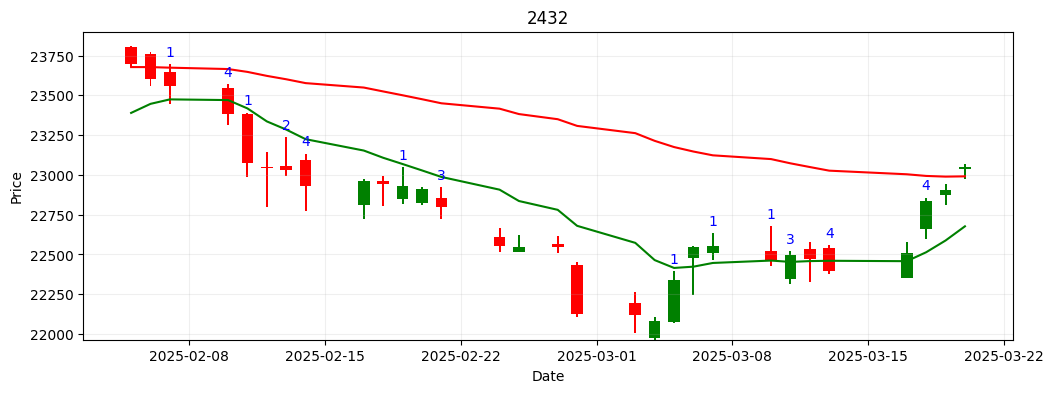

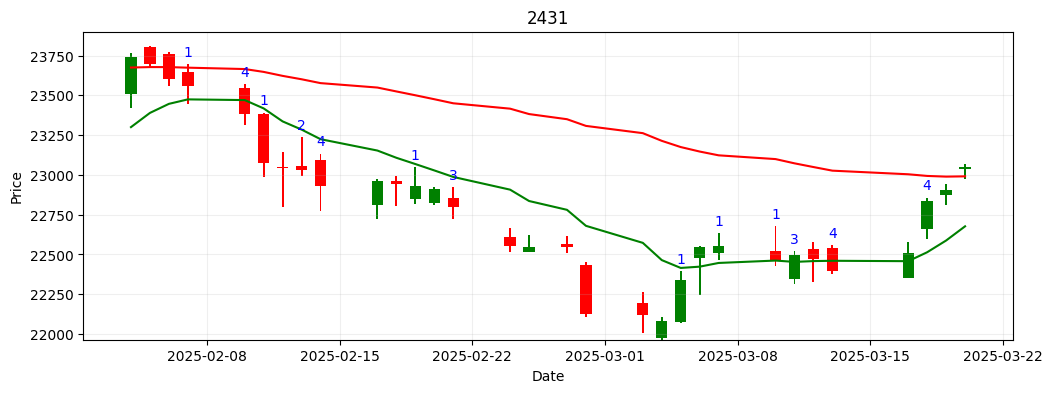

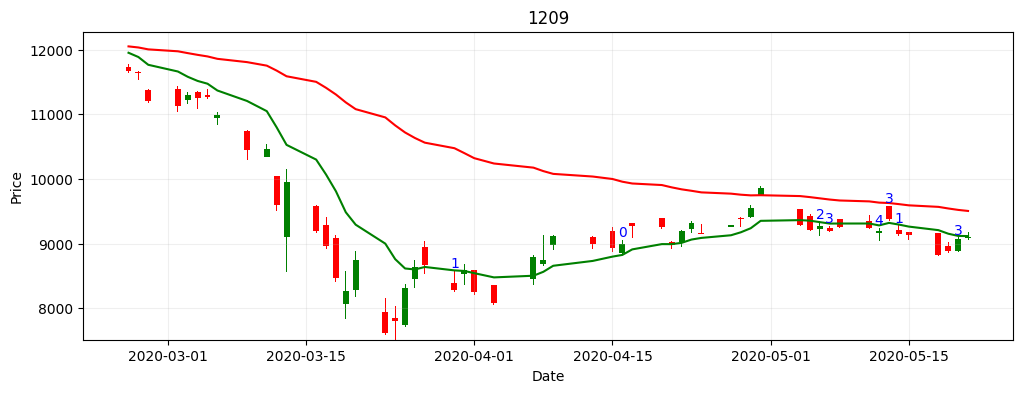

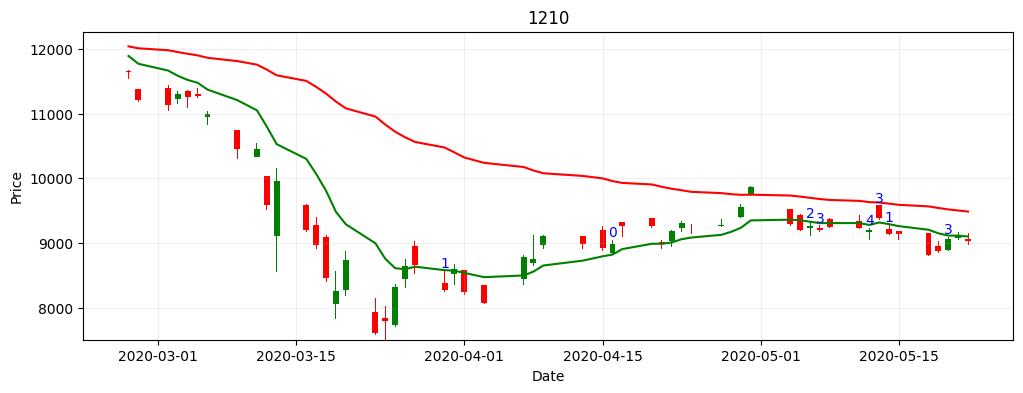

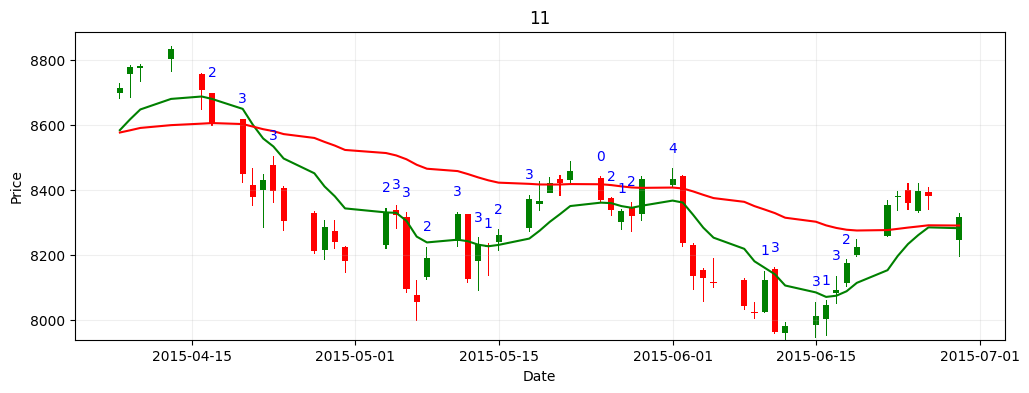

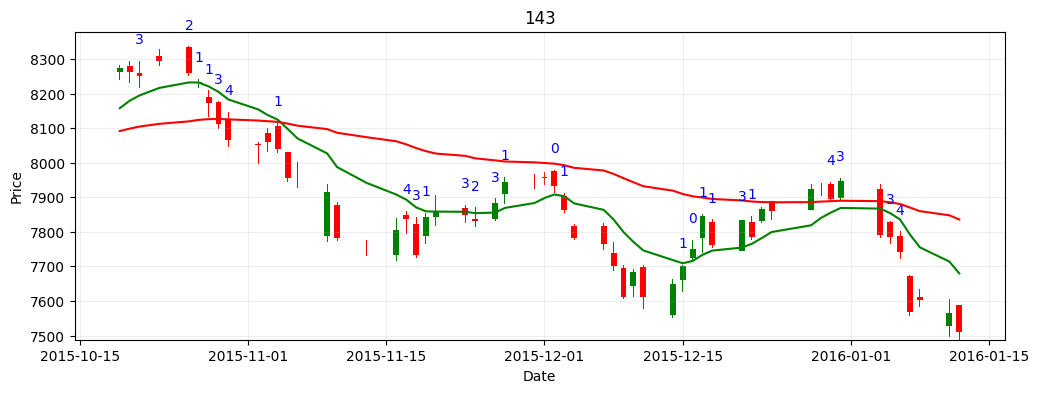

In [18]:
# hist2.loc[12:12+35,['Close']].plot()
# hist2.loc[hist2['Close'].count()-30:, ['Close']].plot()

pt1 = hist2.loc[ln-30:, ]
# pt1 = hist2.loc[ln-31:ln-31+29, ]
# pt2 = hist2.loc[idx:idx+30,]

def candlestick(t, o, h, l, c, pt):
    plt.figure(figsize=(12,4))
    plt.grid(alpha=0.2)
    color = ["green" if close_price > open_price else "red" for close_price, open_price in zip(c, o)]
    plt.bar(x=t, height=np.abs(o-c), bottom=np.min((o,c), axis=0), width=0.6, color=color)
    plt.bar(x=t, height=h-l, bottom=l, width=0.1, color=color)
    plt.plot(t, pt.EMA9, color='g')
    plt.plot(t, pt.EMA50, color='r')
    for x, y, z in zip(t, h+50, pt.CANDLE_MARKER):
        plt.text(x, y, z, horizontalalignment='center', color='b')
    # for x, y, z in zip(t, h+50, pt.HIGH_MARKER):
    #     plt.text(x, y, str(int(z)), horizontalalignment='center')
    # for x, y, z in zip(t, l-100, pt.LOW_MARKER):
    #     plt.text(x, y, str(int(z)), horizontalalignment='center')

    plt.title(pt.index[0])
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.show()


candlestick(
    pt1['Date'],
    pt1["Open"],
    pt1["High"],
    pt1["Low"],
    pt1["Close"],
    pt1
)

# candlestick(
#     pt2['Date'],
#     pt2["Open"],
#     pt2["High"],
#     pt2["Low"],
#     pt2["Close"],
#     pt2
# )

for i in range(5):
  idx = hist2_t10.index[i]
  # idx = 140
  pt2 = hist2.loc[idx:idx+55,]
  candlestick(
    pt2['Date'],
    pt2["Open"],
    pt2["High"],
    pt2["Low"],
    pt2["Close"],
    pt2
  )